<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/Extens%C3%A3o-DS/03%20-%20Arvores%20Decis%C3%A3o/T%C3%B3pico%2003%20-%20Aprendizado%20Supervisionado%20-%20Arvores_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial Árvores de Decisão
Neste tutorial, vamos explorar o algoritmo Árvore de Decisão utilizando a biblioteca scikit-learn. A Árvore de Decisão é um método de classificação que utiliza uma estrutura hierárquica de nós para tomar decisões a partir de atributos das amostras. O funcionamento do algoritmo se baseia na seleção dos melhores atributos para particionar o conjunto de dados de forma a maximizar o ganho de informação e, consequentemente, a reduzir a entropia dos dados.

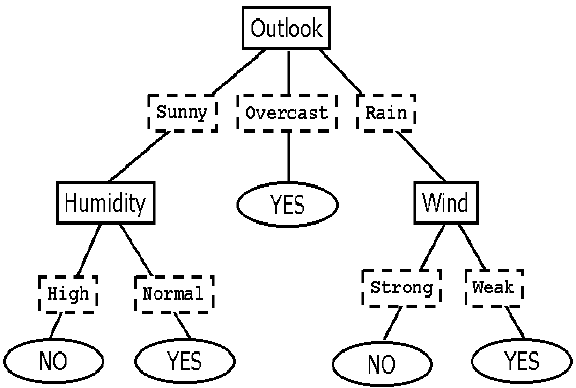

#Dataset

Aqui apresentamos alguns datasets para ilustrar árvores de decisão.
Você pode testar o pipeline de treino e teste para diferentes datasets:

*   Classificação de Vinhos
*   Cancer de Pulmão
*   Iris (Flores)



In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_diabetes
import pandas as pd
#Seed (Garante a reproducibilidade)
random_state = 9999

# carrega os dados do conjunto de dados iris
##dataset = load_iris()
dataset = load_wine()
##dataset = load_breast_cancer()


# converte os dados em um DataFrame do Pandas
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

# adiciona a coluna de target
df['target'] = dataset.target

#Detalhamento dos tipos de dados
df.info()

#Shuffle e mostrar os primeiros 30 elementos
df.sample(frac=1).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.100,2.31,434.0,1
79,12.70,3.87,2.40,23.0,101.0,2.83,2.55,0.43,1.95,2.57,1.190,3.13,463.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.040,2.93,735.0,0
87,11.65,1.67,2.62,26.0,88.0,1.92,1.61,0.40,1.34,2.60,1.360,3.21,562.0,1
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.570,1.78,620.0,2
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.110,4.00,1035.0,0
149,13.08,3.90,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.40,0.570,1.33,550.0,2
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.740,1.80,750.0,2
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.980,1.59,450.0,1
72,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.74,0.980,2.78,472.0,1


#Holdout


In [2]:
from sklearn.model_selection import train_test_split

X = dataset.data
y = dataset.target

print("Full: ", X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state
)

print("Train: ", X_train.shape,y_train.shape)
print("Test: ", X_test.shape,y_test.shape)


Full:  (178, 13) (178,)
Train:  (119, 13) (119,)
Test:  (59, 13) (59,)


#Treinando o Modelo

Durante o treinamento de uma árvore de decisão, o algoritmo avalia os atributos de cada amostra e divide os dados em subgrupos mais homogêneos com base no atributo mais relevante. Esse processo é repetido recursivamente para cada subgrupo até que sejam alcançadas folhas puras, contendo apenas amostras de uma única classe. Para classificar uma nova amostra, basta percorrer a árvore seguindo as ramificações correspondentes aos valores de seus atributos até chegar a uma folha que indica a classe mais provável. Em resumo, a árvore de decisão cria uma estrutura de decisão em forma de árvore durante o treinamento e a usa posteriormente para classificar novas amostras

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Build a Gaussian Classifier
model = DecisionTreeClassifier()

# Model training
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_pred, y_train)

print("Train Accuracy:", accuracy)

Train Accuracy: 1.0


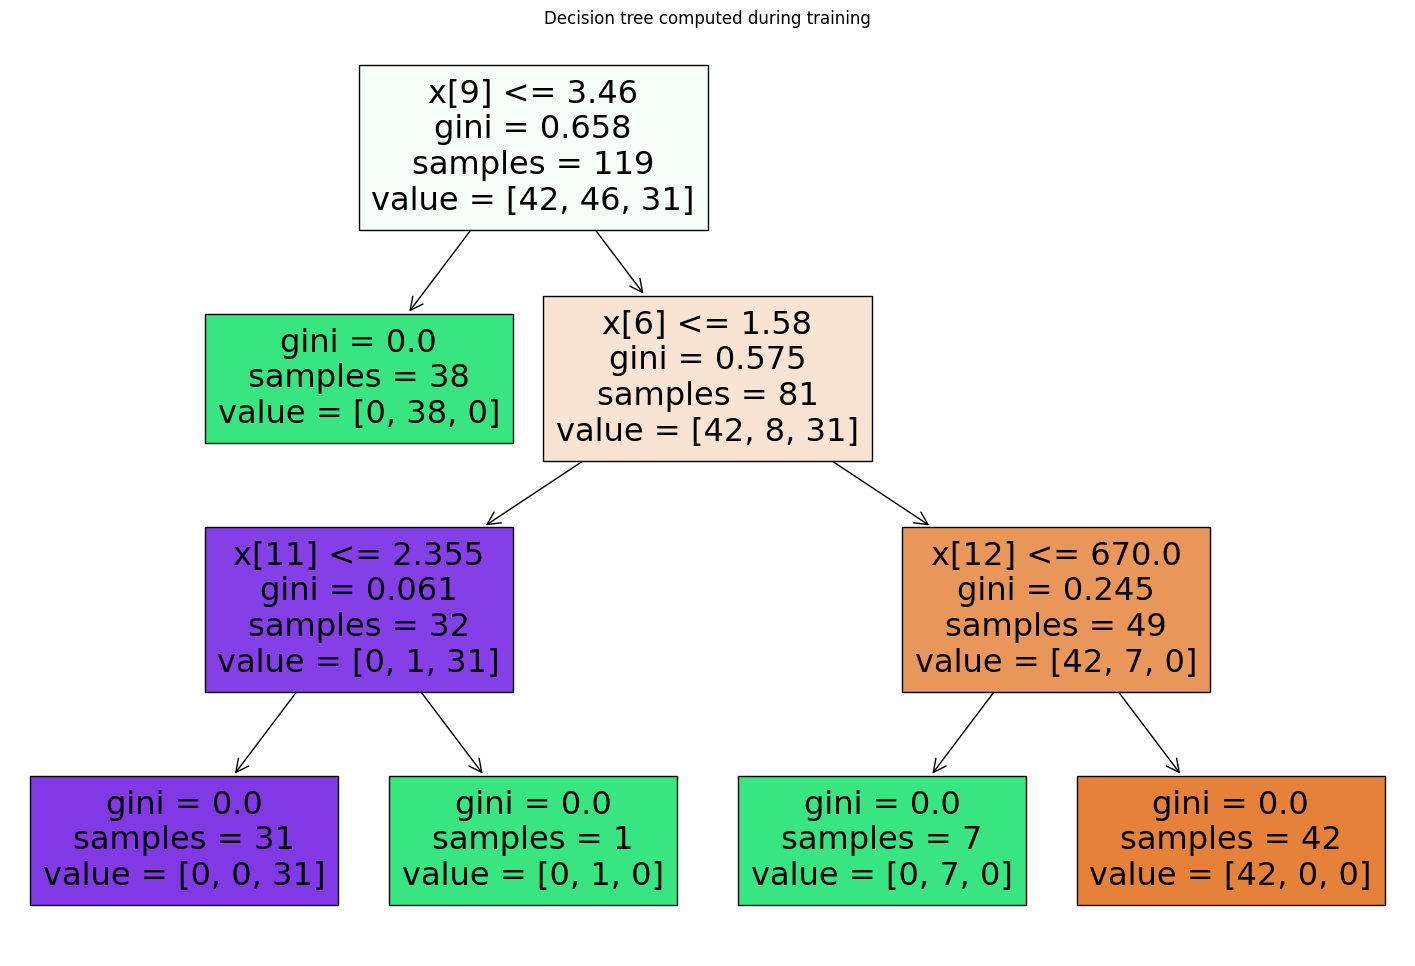

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
plot_tree(model, filled=True)
plt.title("Decision tree computed during training")
plt.show()

#Testando

In [5]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9152542372881356


#Análise dos Resultados

Analisando a acurácia do treino e teste, nota-se que o modelo generalizou o problema, ainda que com acurácia abaixo de 85%.

In [6]:
from sklearn.metrics import classification_report
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.84      0.95      0.89        22
           2       0.94      0.89      0.91        18

    accuracy                           0.92        59
   macro avg       0.93      0.91      0.92        59
weighted avg       0.92      0.92      0.92        59



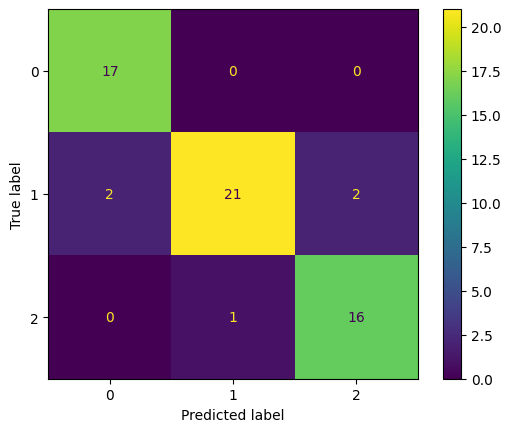

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

#Analisando Fronteiras de Decisão

Abaixo computamos com o auxilio do scikit-learn, as fronteiras de decisão, utilizando pares de váriaveis.

<ipython-input-8-0e5347d18818>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-8-0e5347d18818>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-8-0e5347d18818>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-8-0e5347d18818>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-8-0e5347d18818>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-8-0e5347d18818>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


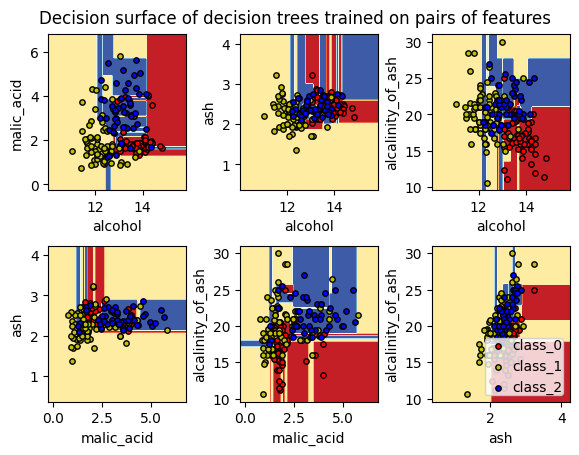

In [8]:
import numpy as np


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay


# Parameters
n_classes = len(np.unique(y))
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):

    # We only take the two corresponding features
    X = dataset.data[:, pair]
    y = dataset.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=dataset.feature_names[pair[0]],
        ylabel=dataset.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=dataset.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

#Exercícios

Utilizando a função 'make_classification' para gerar datasets sintéticos, crie diferentes cenários e avalie o desempenho da árvore de decisao.

Considere:

* Aumentar o número de características
* Complexidade do dataset (Classes com overlap ou linearmente separaveis)

Avalie:
* Tempo de treino e teste
* Desepenho (Acurácia e Matriz de Confusão)
* Produza uma analise crítica



O Scikit-Learn e o Kaggle também possuem outras bases interessantes. Pesquise nos respectivos sites, bases de classificação e teste com os três modelos que já aprendemos (KNN, NAIVE BAYES e ÁRVORES)